In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [7]:
df = pd.read_csv('spam.csv' , encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##  1 Data Cleaning 

In [14]:
df.info()   ## value missing in last 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
df.drop(columns = ['Unnamed: 2' ,'Unnamed: 3'	,'Unnamed: 4'] ,inplace = True)


In [24]:
## renaming v1 and v2
df.rename(columns = {'v1': 'Target' , 'v2' : 'Text'} , inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
## making ham or spam to a value
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [30]:
 df['Target'] = encoder.fit_transform(df['Target'])

In [32]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
### missing value check
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [36]:
### check for duplicate value
df.duplicated().sum()

403

In [42]:
## remove duplicates
df = df.drop_duplicates(keep='first')

In [44]:
df.duplicated().sum()

0

 ### 2. EDA

In [50]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

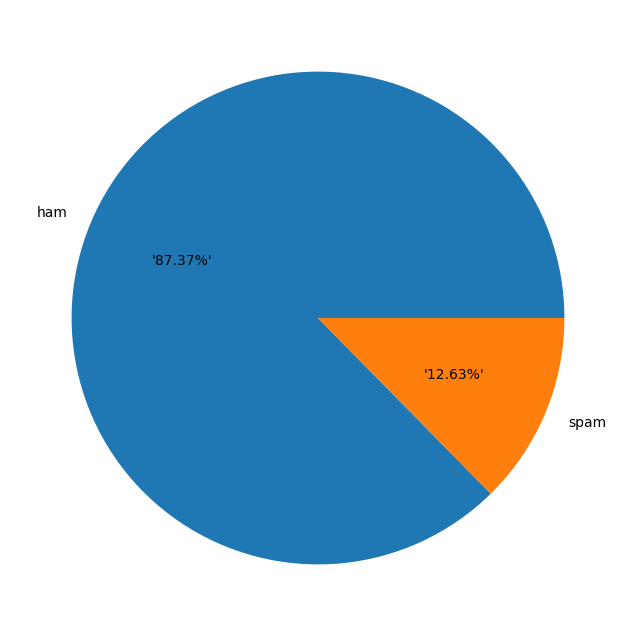

In [124]:
import matplotlib  ### for data visualization largely
matplotlib.rcParams['figure.figsize'] = (16,8)
plt.pie(df['Target'].value_counts() , labels = ['ham','spam'] , autopct = "'%1.2f%%'")
plt.show()

In [260]:
## more ham then spam
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [241]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIDDHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
!pip install nltk

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIDDHANT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [78]:
## text every msg caluclate length
df['num_characters'] = df['Text'].apply(len) 

In [80]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [90]:
## number  of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [92]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [102]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [116]:
##df.drop(columns = ['num_sentence'] , inplace = True)
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [118]:
## ham
df[df['Target']==0] [['num_characters','num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [120]:
## spam 
df[df['Target']==1] [['num_characters','num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

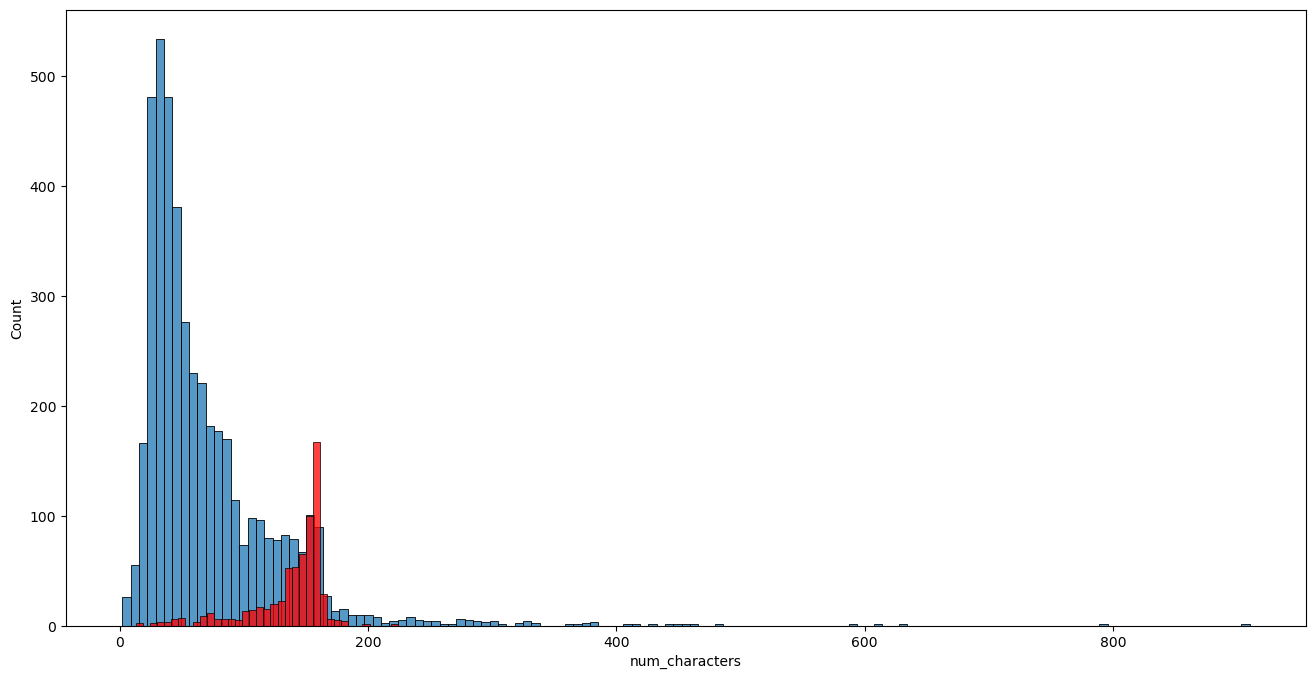

In [130]:
## seeeing data by graph
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

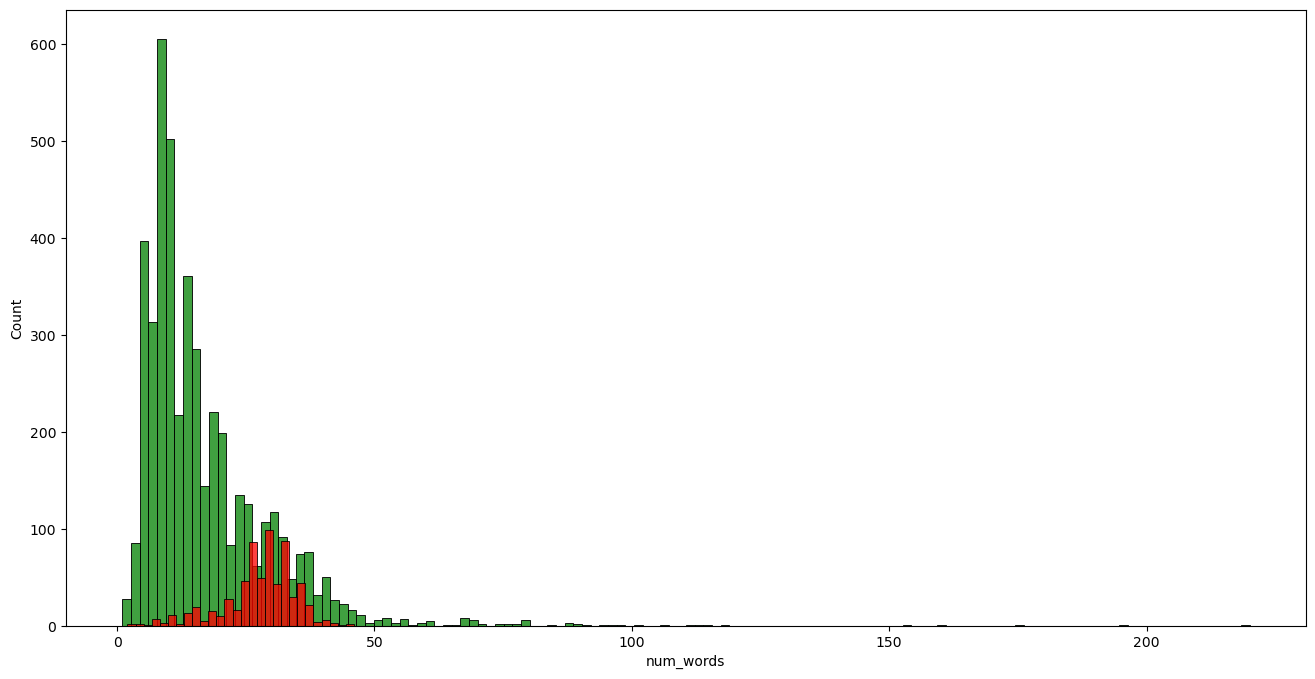

In [132]:
sns.histplot(df[df['Target']==0]['num_words'],color = 'green')
sns.histplot(df[df['Target']==1]['num_words'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

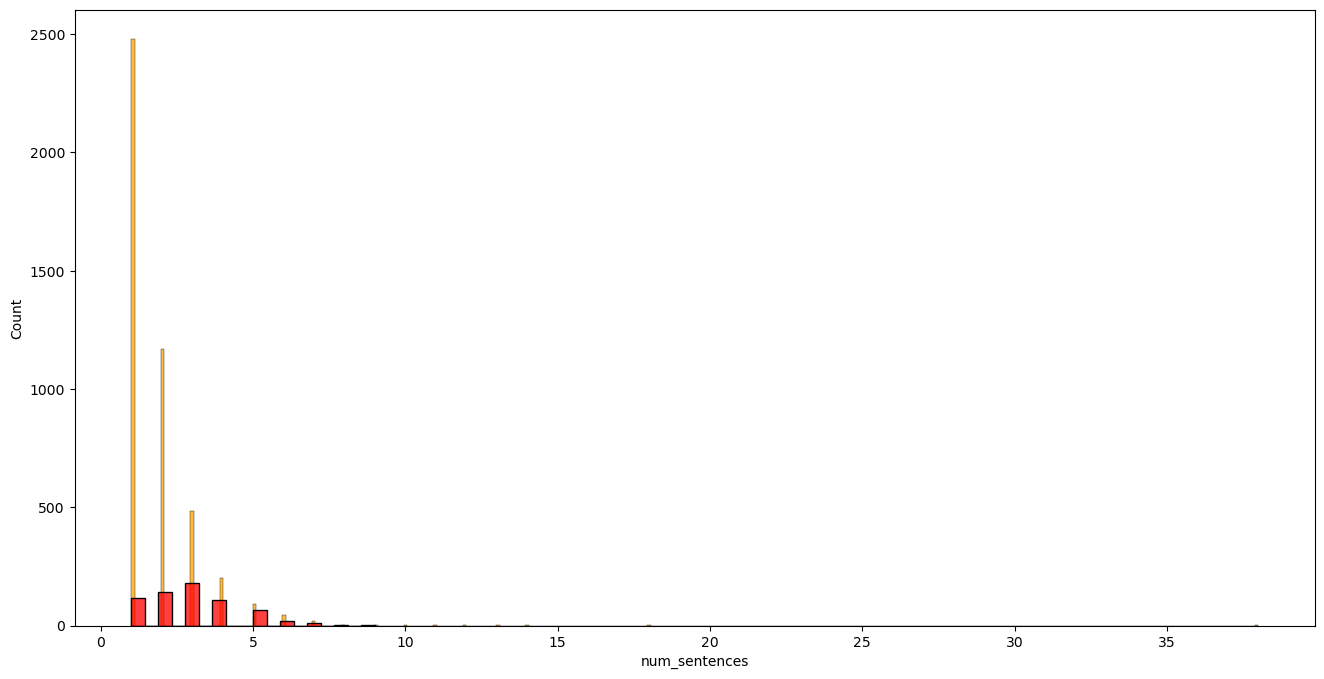

In [136]:
sns.histplot(df[df['Target']==0]['num_sentences'],color = 'orange')
sns.histplot(df[df['Target']==1]['num_sentences'],color = 'red')

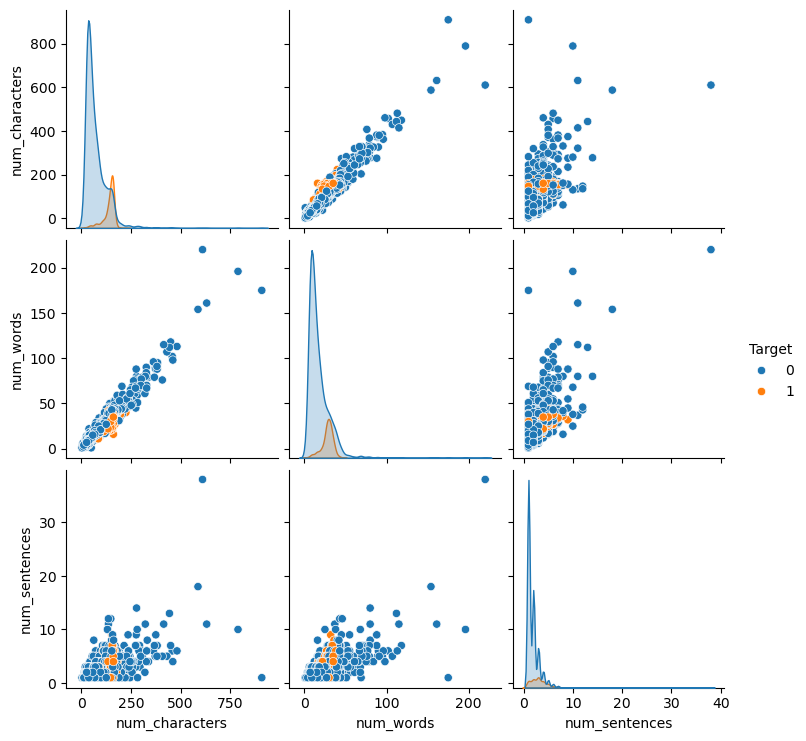

In [138]:
sns.pairplot(df,hue = 'Target')

In [156]:
### checking correlation
df.dtypes
df.select_dtypes(include='number').corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

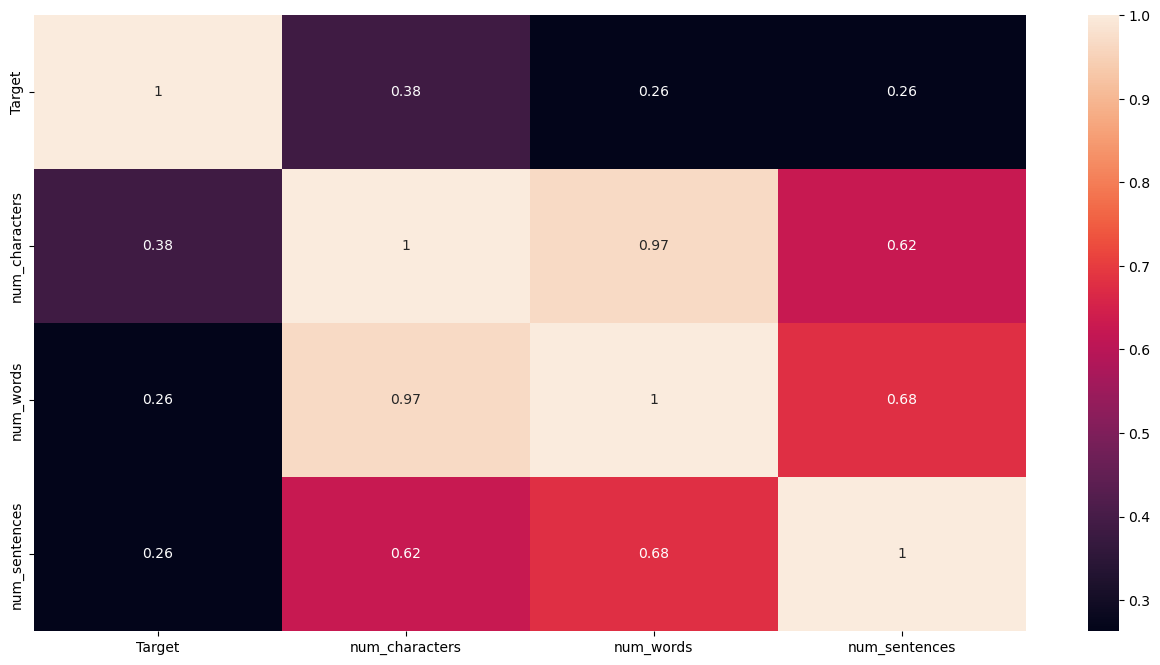

In [160]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot = True)

### 3. DATA Preprocessing

. Lower case
. Tokenization
. removing special characters
. removing stop words and punctuation
. streamming

In [262]:
import string
def transform_text(text):
    text = text.lower() ## lowering text
    text = nltk.word_tokenize(text) ## convert text into list
    
    y = []
    for i in text: ## removing special charaactor
        if i.isalnum():
            y.append(i)


    text = y[:]  ## removing stop words 
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]  ## streaming like change dances,dancing to dance
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)   

In [266]:
 transform_text('I loved YT lectures?? ')

'love yt lectur'

In [271]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [272]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [283]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 653.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.2 kB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [289]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [301]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

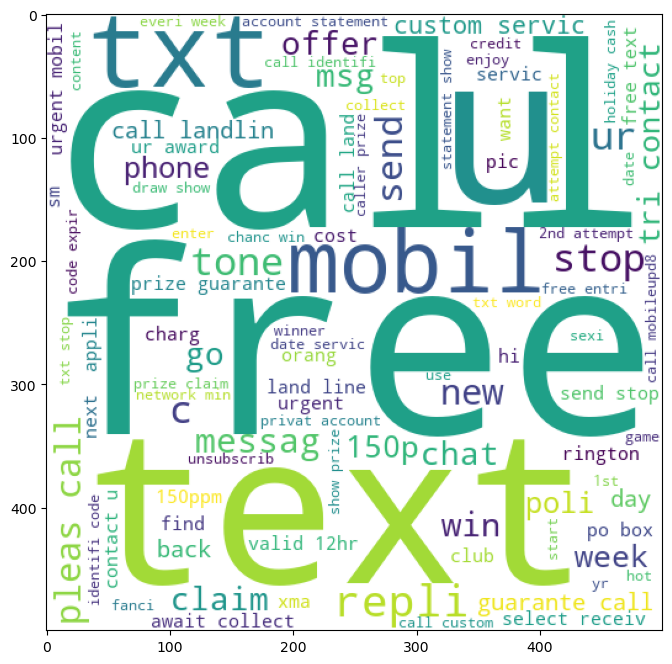

In [303]:
plt.imshow(spam_wc) ##  spam msg common appear most time

In [305]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

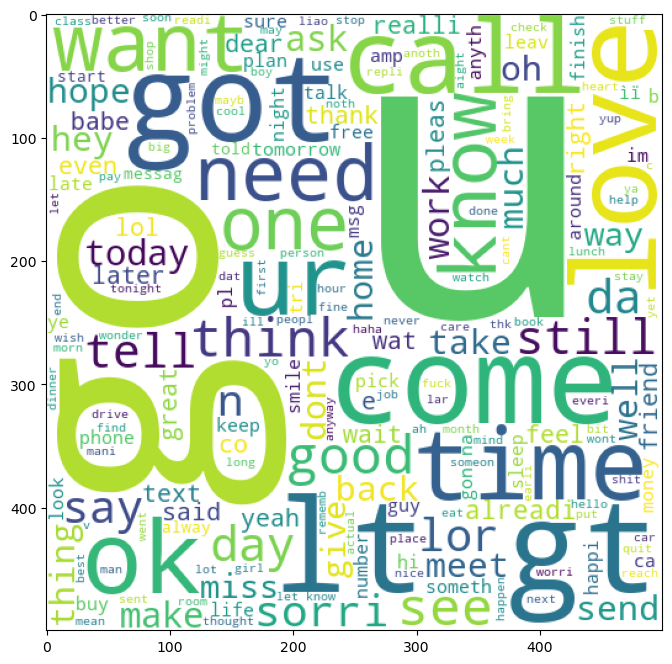

In [307]:
plt.imshow(ham_wc)

In [309]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [311]:
len(spam_corpus)

9939

In [325]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [347]:
from collections import Counter  ## create dictionary of word appear in spam msg
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [349]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [351]:
from collections import Counter  ## create dictionary of word appear in ham msg
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


#### 4.MODEL BUILDING


In [457]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [459]:
x = tfid.fit_transform(df['transformed_text']).toarray()

In [461]:
x.shape

(5169, 3000)

In [463]:
y = df['Target'].values

In [465]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [467]:
from sklearn.model_selection import train_test_split

In [469]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [471]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [473]:
gnb =  GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [475]:
gnb.fit(x_train,y_train)  ## baad performance less precison score
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1)) 
print(confusion_matrix (y_test,y_pred1)) 
print(precision_score(y_test,y_pred1)) 

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [477]:
mnb.fit(x_train,y_train)  
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2)) 
print(confusion_matrix (y_test,y_pred2)) 
print(precision_score(y_test,y_pred2)) 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [479]:
bnb.fit(x_train,y_train)  ## good precision score 0.97
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3)) 
print(confusion_matrix (y_test,y_pred3)) 
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Model improving

In [425]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [427]:
x = tfid.fit_transform(df['transformed_text']).toarray()

In [439]:
x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [443]:
x.shape

(5169, 3001)

In [445]:
y = df['Target'].values

In [431]:
from sklearn.model_selection import train_test_split

In [433]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [435]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [447]:
gnb =  GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [449]:
gnb.fit(x_train,y_train)  ## baad performance less precison score
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1)) 
print(confusion_matrix (y_test,y_pred1)) 
print(precision_score(y_test,y_pred1)) 

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [451]:
mnb.fit(x_train,y_train)  
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2)) 
print(confusion_matrix (y_test,y_pred2)) 
print(precision_score(y_test,y_pred2)) 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [453]:
bnb.fit(x_train,y_train)  ## good precision score 0.97
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3)) 
print(confusion_matrix (y_test,y_pred3)) 
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [455]:
## using MultinomialNB best  model

In [483]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))